# Data Science Agriculture Project

## Scenario

You and your team are building a random-forest model to predict the yield of sugarcane fields at harvest. Your job is to look at the time-series data provided and derive a number of features from it that you think are worth testing further. You will then present these ideas to your team as well as your planned methodology about how you are going to test the value of these features further on a larger data set.  You are also free to propose other interesting ideas for features you had while exploring the data, but have not had time to build.

## Rules and Criteria:

<ol>
    <li>Project must be done in python. Feel free to use any python libraries.</li>
    <li>Feature ideas can be your own and/or from papers. Please link to any papers used.</li>
    <li>Feel free to ignore parts of the provided dataset completely and spend your time in areas you believe highlight your skills. Dive deep into a single feature or two or present a broad set of simple features, both are valid options.</li>
    <li>Project should not take more than a few hours. If you find yourself spending too much time on the project, feel free to make notes about how you would continue if you had more time. Your ability to articulate thoughts and ideas is more important than your code.</li>
    <li>Have A plan on how you would analyze how suitable the features you developed are for potential inclusion in the final machine learning model.</li>
    <li>Feel free to make some assumptions, just be aware of any assumptions you made and let us know what they were.
    <li>Feel free, but not obligated to ask questions.</li>
</ol>

## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import date, datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from functools import reduce

## Loading the .csv files

In [3]:
df_cultivations_original = pd.read_csv (r'Data\cultivations.csv')
df_msavi_mean_original = pd.read_csv (r'Data\msavi_mean.csv')
df_weather_original = pd.read_csv (r'Data\weather.csv')

In [4]:
df_cultivations_original

,Unnamed: 0,created_at,cultivation_id,cultivation_name,harvest date,grow start date,yield
0,0,2020-10-26 21:20:04.316752,18902,A,2020-05-23 00:00:00.000000,04/04/19,52.4
1,1,2020-10-26 21:20:09.122294,18932,B,2020-02-06 00:00:00.000000,11/14/18,138.5
2,3,2020-10-26 21:20:21.627212,19009,C,2020-05-19 00:00:00.000000,2019-03-16 00:00:00.000000,72.6
3,5,2020-10-26 21:20:25.007851,19030,D,2020-02-27 00:00:00.000000,2018-12-12 00:00:00.000000,103.6
4,7,2020-10-26 21:20:40.866737,19129,E,2020-01-07 00:00:00.000000,2018-10-08 00:00:00.000000,141.0


In [5]:
df_msavi_mean_original

,Unnamed: 0,observation_date,meta_data,cultivation_id,data_value
0,0,2019-10-23 16:06:02.085467,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN
1,1,2020-06-27 16:15:56.338923,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.635420
2,2,2019-10-23 16:06:02.085467,"{'pixel_count': 1546, 'unmasked_count': 0.0, '...",19009,NaN
3,3,2020-06-02 16:16:00.038355,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN
4,4,2019-10-23 16:06:02.085467,"{'pixel_count': 3356, 'unmasked_count': 0.0, '...",19030,NaN
...,...,...,...,...,...
2671,2671,2018-02-20 16:05:08.462000,"{'pixel_count': 1323, 'unmasked_count': 1323.0...",1912,0.080866
2672,2672,2018-03-07 16:05:01.464000,"{'pixel_count': 1323, 'unmasked_count': 0.0, '...",1912,NaN
2673,2673,2018-06-05 16:05:08.462000,"{'pixel_count': 1323, 'unmasked_count': 0.0, '...",1912,NaN
2674,2674,2018-04-21 16:05:13.457000,"{'pixel_count': 1323, 'unmasked_count': 0.0, '...",1912,NaN


In [6]:
df_weather_original

,Unnamed: 0,observation_date,weather_data,cultivation_id
0,0,2018-08-17 04:00:00.000000,"{'et': 5.000000000000001, 'prcp': 0.0, 'tmax':...",1912
1,1,2018-08-16 04:00:00.000000,"{'et': 4.8900000000000015, 'prcp': 50.73, 'tma...",1912
2,2,2018-08-15 04:00:00.000000,"{'et': 4.380000000000001, 'prcp': 37.83, 'tmax...",1912
3,3,2018-08-14 04:00:00.000000,"{'et': 4.05, 'prcp': 4.41, 'tmax': 35.9, 'tmin...",1912
4,4,2018-08-13 04:00:00.000000,"{'et': 4.81, 'prcp': 0.77, 'tmax': 34.7, 'tmin...",1912
...,...,...,...,...
6669,6669,2018-09-19 04:00:00.000000,"{'et': 4.55, 'prcp': 0.0, 'tmax': 35.9, 'tmin'...",19030
6670,6670,2018-09-18 04:00:00.000000,"{'et': 4.120000000000001, 'prcp': 0.0, 'tmax':...",19030
6671,6671,2018-09-17 04:00:00.000000,"{'et': 4.2200000000000015, 'prcp': 1.569999999...",19030
6672,6672,2018-09-16 04:00:00.000000,"{'et': 4.37, 'prcp': 0.0, 'tmax': 34.7, 'tmin'...",19030


The sample consists of only 5 entries, the rest is time-series data.

## Data Cleaning

### Removing the .csv Indices

Since the readMe file does not mention the unnamed column, I assume that this is an index column (Despite for the cultivations.csv having a non-natural order).

In [7]:
df_cultivations = df_cultivations_original.drop(['Unnamed: 0'], axis =1)
df_msavi_mean = df_msavi_mean_original.drop(['Unnamed: 0'], axis =1)
df_weather = df_weather_original.drop(['Unnamed: 0'], axis =1)

### Expand the dictionary columns into panda columns

*weather.csv* and *msavi_maen.csv* both have a column that looks like a dictionary.

In [8]:
print(type(df_msavi_mean['meta_data'].loc[0]))
print(type(df_weather['weather_data'].loc[0]))

<class 'str'>
<class 'str'>


The whole column is stored as a string. So the procedure is to first convert it into a dictionary and then concatenate to the column level.

In [9]:
#msavi_mean data frame
df_msavi_mean['meta_data'] = df_msavi_mean.apply(lambda row: ast.literal_eval(row['meta_data']), axis=1)
df_msavi_mean['meta_data'].apply(pd.Series)
df_msavi_mean = pd.concat([df_msavi_mean, df_msavi_mean['meta_data'].apply(pd.Series)], axis=1)
df_msavi_mean = df_msavi_mean.drop(['meta_data'], axis = 1)

#weather data frame
df_weather['weather_data'] = df_weather.apply(lambda row: ast.literal_eval(row['weather_data']), axis=1)
df_weather['weather_data'].apply(pd.Series)
df_weather = pd.concat([df_weather, df_weather['weather_data'].apply(pd.Series)], axis=1)
df_weather = df_weather.drop(['weather_data'], axis = 1)

In [10]:
df_msavi_mean.head()

,observation_date,cultivation_id,data_value,pixel_count,unmasked_count,unmasked_fraction
0,2019-10-23 16:06:02.085467,18902,NaN,1088.0,0.0,0.0
1,2020-06-27 16:15:56.338923,18932,0.63542,3636.0,3636.0,1.0
2,2019-10-23 16:06:02.085467,19009,NaN,1546.0,0.0,0.0
3,2020-06-02 16:16:00.038355,18902,NaN,1088.0,0.0,0.0
4,2019-10-23 16:06:02.085467,19030,NaN,3356.0,0.0,0.0


In [11]:
df_weather.head()

,observation_date,cultivation_id,et,prcp,tmax,tmin,gdd12,smi_5,smi_15,smi_50
0,2018-08-17 04:00:00.000000,1912,5.00,0.00,35.7,24.6,17.129167,0.897333,0.880500,0.527500
1,2018-08-16 04:00:00.000000,1912,4.89,50.73,35.0,24.8,17.104167,0.940500,0.933625,0.494875
2,2018-08-15 04:00:00.000000,1912,4.38,37.83,33.3,24.6,16.362500,1.040875,0.999000,0.467292
3,2018-08-14 04:00:00.000000,1912,4.05,4.41,35.9,23.4,15.345833,0.945917,0.829042,0.448625
4,2018-08-13 04:00:00.000000,1912,4.81,0.77,34.7,23.4,16.300000,1.015125,0.828292,0.445875


### Converting date columns from string to date type

The date columns in all three *csv* files are stored as string. We convert them back to dates to make manipulation later, easier.

In [12]:
def convert_datetime(row, column):
    temp = row[column]
    try:
        ans = datetime.strptime(temp, '%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        try :
            ans = datetime.strptime(temp, '%Y-%m-%d %H:%M:%S')
        except ValueError:
            ans = datetime.strptime(temp, '%m/%d/%y')
    return ans

In [13]:
print(type(df_cultivations['created_at'].loc[0]))
print(type(df_cultivations['harvest date'].loc[0]))
print(type(df_msavi_mean['observation_date'].loc[0]))
print(type(df_weather['observation_date'].loc[0]))
print(type(df_cultivations['grow start date'].loc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [14]:
df_cultivations['created_at']=df_cultivations.apply(lambda row: convert_datetime(row,'created_at'), axis = 1)
df_cultivations['harvest date']=df_cultivations.apply(lambda row: convert_datetime(row,'harvest date'), axis = 1)
df_cultivations['grow start date']=df_cultivations.apply(lambda row: convert_datetime(row,'grow start date'), axis = 1)
df_msavi_mean['observation_date']=df_weather.apply(lambda row: convert_datetime(row,'observation_date'), axis = 1)
df_weather['observation_date']=df_weather.apply(lambda row: convert_datetime(row,'observation_date'), axis = 1)

### Check if the cultivation_id agree before any join takes place:

According to the documentation provided, *cultivation_id* is the key that determines the cultivation. We need to ensure that this appear correctly in all *csv* files.

In [15]:
print('df_cultivations: ' , np.sort(df_cultivations['cultivation_id'].unique()))
print('df_msavi_mean: ' , np.sort(df_msavi_mean['cultivation_id'].unique()))
print('df_weather: ' , np.sort(df_weather['cultivation_id'].unique()))

df_cultivations:  [18902 18932 19009 19030 19129]
df_msavi_mean:  [ 1912 18902 18932 19009 19030]
df_weather:  [ 1912 18902 18932 19009 19030]


Clearly, for df_weather and df_msavi_mean, one of the cultivations has the wrong id. We change 1912 to 19129.

In [16]:
df_msavi_mean['cultivation_id'] = df_msavi_mean['cultivation_id'].replace([1912], 19129)
df_weather['cultivation_id'] = df_weather['cultivation_id'].replace([1912], 19129)

### Dealing with the NaNs, zeros and negative values

#### df_msavi_mean

<AxesSubplot:xlabel='data_value', ylabel='Density'>

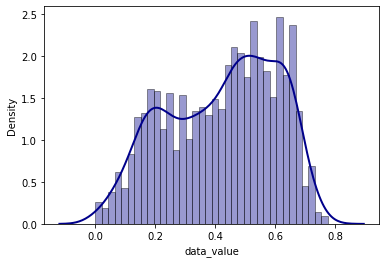

In [17]:
sns.distplot(df_msavi_mean['data_value'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [18]:
df_msavi_mean['data_value'].describe()

count    1935.000000
mean        0.421904
std         0.181884
min         0.000015
25%         0.269064
50%         0.451015
75%         0.572831
max         0.775386
Name: data_value, dtype: float64

In [19]:
print("df_msavi_mean")
print("---------------------")
print("data_value NaNs:", df_msavi_mean['data_value'].isna().sum())
print("unmasked_count NaNs:", df_msavi_mean['unmasked_count'].isna().sum())
print("unmasked_fraction NaNs:", df_msavi_mean['unmasked_fraction'].isna().sum())
print("pixel_count NaNs:", df_msavi_mean['pixel_count'].isna().sum())
print("---------------------")
print("data_value zeros:", (df_msavi_mean['data_value']==0).sum())
print("unmasked_count zeros:", (df_msavi_mean['unmasked_count']==0).sum())
print("unmasked_fraction zeros:", (df_msavi_mean['unmasked_fraction']==0).sum())
print("pixel_count zeros:", (df_msavi_mean['pixel_count']==0).sum())
print("---------------------")
print("data_value negative:", (df_msavi_mean['data_value']<0).sum())
print("unmasked_count negative:", (df_msavi_mean['unmasked_count']<0).sum())
print("unmasked_fraction negative:", (df_msavi_mean['unmasked_fraction']<0).sum())
print("pixel_count negative:", (df_msavi_mean['pixel_count']<0).sum())

df_msavi_mean
---------------------
data_value NaNs: 741
unmasked_count NaNs: 0
unmasked_fraction NaNs: 0
pixel_count NaNs: 0
---------------------
data_value zeros: 0
unmasked_count zeros: 739
unmasked_fraction zeros: 739
pixel_count zeros: 0
---------------------
data_value negative: 0
unmasked_count negative: 3
unmasked_fraction negative: 3
pixel_count negative: 0


Just by curiosity, let's see what is the *data_value* when *unmasked_count* is negative or zero:

In [20]:
print('unmasked_count equal to 0:') 
print(df_msavi_mean[df_msavi_mean['unmasked_count']==0]['data_value'].value_counts(dropna = False))
print("---------------------")
print('unmasked_count negative:') 
print(df_msavi_mean[df_msavi_mean['unmasked_count']<0]['data_value'].value_counts(dropna = False))

unmasked_count equal to 0:
NaN    739
Name: data_value, dtype: int64
---------------------
unmasked_count negative:
NaN         2
0.263972    1
Name: data_value, dtype: int64


Firstly, we remove all the negative values. It does not make sense to have a negative *unmasked_count* or *unmasked_fraction*.

Secondly, We assume that when unmasked_count* is zero, the images are useless since they are covered by the clouds. Thus, we take the liberty to remove such rows. By definition *data_value(msavi2)* is the mean value of all un-masked pixels. So we expect this to be zero or in this case NaN when the *unmasked_count* is zero.

In [21]:
#Removing negative
df_msavi_mean_cleanInProgress = df_msavi_mean[df_msavi_mean['unmasked_count']>=0].reset_index(drop=True)

#Removing zeros
df_msavi_mean_cleanInProgress = df_msavi_mean_cleanInProgress[df_msavi_mean_cleanInProgress['unmasked_count']!=0].reset_index(drop=True)

In [22]:
print("df_msavi_mean_cleanInProgress")
print("---------------------")
print("data_value NaNs:", df_msavi_mean_cleanInProgress['data_value'].isna().sum())
print("unmasked_count NaNs:", df_msavi_mean_cleanInProgress['unmasked_count'].isna().sum())
print("unmasked_fraction NaNs:", df_msavi_mean_cleanInProgress['unmasked_fraction'].isna().sum())
print("pixel_count NaNs:", df_msavi_mean_cleanInProgress['pixel_count'].isna().sum())
print("---------------------")
print("data_value zeros:", (df_msavi_mean_cleanInProgress['data_value']==0).sum())
print("unmasked_count zeros:", (df_msavi_mean_cleanInProgress['unmasked_count']==0).sum())
print("unmasked_fraction zeros:", (df_msavi_mean_cleanInProgress['unmasked_fraction']==0).sum())
print("pixel_count zeros:", (df_msavi_mean_cleanInProgress['pixel_count']==0).sum())
print("---------------------")
print("data_value negative:", (df_msavi_mean_cleanInProgress['data_value']<0).sum())
print("unmasked_count negative:", (df_msavi_mean_cleanInProgress['unmasked_count']<0).sum())
print("unmasked_fraction negative:", (df_msavi_mean_cleanInProgress['unmasked_fraction']<0).sum())
print("pixel_count negative:", (df_msavi_mean_cleanInProgress['pixel_count']<0).sum())

df_msavi_mean_cleanInProgress
---------------------
data_value NaNs: 0
unmasked_count NaNs: 0
unmasked_fraction NaNs: 0
pixel_count NaNs: 0
---------------------
data_value zeros: 0
unmasked_count zeros: 0
unmasked_fraction zeros: 0
pixel_count zeros: 0
---------------------
data_value negative: 0
unmasked_count negative: 0
unmasked_fraction negative: 0
pixel_count negative: 0


Now that everything is cleaned, we assign *df_msavi_mean_cleanInProgress*  to  *df_msavi_mean*.

In [23]:
df_msavi_mean = df_msavi_mean_cleanInProgress

#### df_weather

Here the columns should be allowed to be zero (and negative in some cases) so the main focus is to deal with NaNs. However, I still include the zeros and the negative just as a glance.

In [24]:
print("df_weather")
print("---------------------")
print("et NaNs:", df_weather['et'].isna().sum())
print("prcp NaNs:", df_weather['prcp'].isna().sum())
print("tmax NaNs:", df_weather['tmax'].isna().sum())
print("tmin NaNs:", df_weather['tmin'].isna().sum())
print("gdd12 NaNs:", df_weather['gdd12'].isna().sum())
print("smi_5 NaNs:", df_weather['smi_5'].isna().sum())
print("smi_15 NaNs:", df_weather['smi_15'].isna().sum())
print("smi_50 NaNs:", df_weather['smi_50'].isna().sum())
print("---------------------")
print("et zeros:", (df_weather['et']==0).sum())
print("prcp zeros:", (df_weather['prcp']==0).sum())
print("tmax zeros:", (df_weather['tmax']==0).sum())
print("tmin zeros:", (df_weather['tmin']==0).sum())
print("gdd12 zeros:", (df_weather['gdd12']==0).sum())
print("smi_5 zeros:", (df_weather['smi_5']==0).sum())
print("smi_15 zeros:", (df_weather['smi_15']==0).sum())
print("smi_50 zeros:", (df_weather['smi_50']==0).sum())
print("---------------------")
print("et negative:", (df_weather['et']<0).sum())
print("prcp negative:", (df_weather['prcp']<0).sum())
print("tmax negative:", (df_weather['tmax']<0).sum())
print("tmin negative:", (df_weather['tmin']<0).sum())
print("gdd12 negative:", (df_weather['gdd12']<0).sum())
print("smi_5 negative:", (df_weather['smi_5']<0).sum())
print("smi_15 negative:", (df_weather['smi_15']<0).sum())
print("smi_50 negative:", (df_weather['smi_50']<0).sum())

df_weather
---------------------
et NaNs: 0
prcp NaNs: 0
tmax NaNs: 0
tmin NaNs: 0
gdd12 NaNs: 0
smi_5 NaNs: 0
smi_15 NaNs: 0
smi_50 NaNs: 0
---------------------
et zeros: 19
prcp zeros: 3530
tmax zeros: 0
tmin zeros: 1
gdd12 zeros: 4
smi_5 zeros: 585
smi_15 zeros: 1194
smi_50 zeros: 2634
---------------------
et negative: 0
prcp negative: 0
tmax negative: 0
tmin negative: 2
gdd12 negative: 0
smi_5 negative: 0
smi_15 negative: 0
smi_50 negative: 0


No NaNs, so no action taken.

## Data Exploration

Taking a look at [1] we see that the most popular features are temperature, soil type, rainfall with soil type coming fifth.

These are precisely the data that we have.

### Final yield

First, we plot the Final Yield of each cultivation on a bar chart, simply to view the result visually:

In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

Text(0.5, 1.0, 'Final Yield of Each Cultivation')

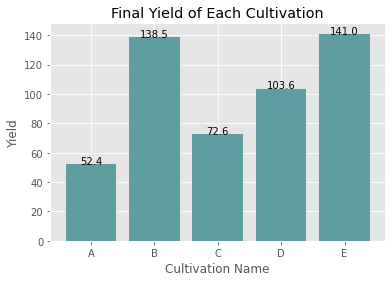

In [26]:
plt.style.use('ggplot')
plt.bar(df_cultivations['cultivation_name'],df_cultivations['yield'], color ='cadetblue')
addlabels(df_cultivations['cultivation_name'], df_cultivations['yield'])
plt.xlabel("Cultivation Name")
plt.ylabel("Yield")
plt.title("Final Yield of Each Cultivation")

Clearly, cultivation B and E have been the most successful.

If we had more information we could have taken a look at the distribution of the yields.

### Raw feature distribution

#### data_value

Visual plot to see the non-NaN *data_values* on the *df_msavi_mean*

<AxesSubplot:xlabel='data_value', ylabel='Density'>

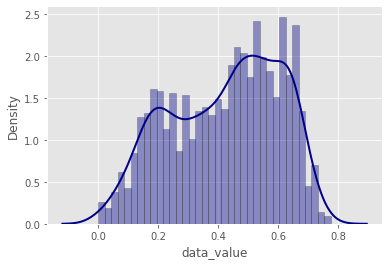

In [27]:
sns.distplot(df_msavi_mean['data_value'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [28]:
df_msavi_mean['data_value'].describe()

count    1934.000000
mean        0.421985
std         0.181896
min         0.000015
25%         0.269091
50%         0.451132
75%         0.572860
max         0.775386
Name: data_value, dtype: float64

In [29]:
within2std = df_msavi_mean[df_msavi_mean['data_value'] > (np.mean(df_msavi_mean['data_value']) + (2*np.std(df_msavi_mean['data_value'])))].shape[0]
within2std = within2std + df_msavi_mean[df_msavi_mean['data_value'] < (np.mean(df_msavi_mean['data_value']) - (2*np.std(df_msavi_mean['data_value'])))].shape[0]
print('How many entries have price within 2 standard deviations to the mean:')
print(within2std)
print(within2std/df_msavi_mean.shape[0] * 100, '% of the data')

How many entries have price within 2 standard deviations to the mean:
29
1.499482936918304 % of the data


Only 1.5% of the data are outside of the 2 standard devation range. Thus, there are not many outliers in this table.

#### Temperatures

In [30]:
df_msavi_mean['month']= df_msavi_mean['observation_date'].dt.month

In [31]:
def get_season(row):
    if (row['month']) in range(1,4):
        return 'winter'
    elif (row['month']) in range(3,7):
        return 'spring'
    elif (row['month']) in range(6,9):
        return 'summer'
    else:
        return 'fall'

In [32]:
df_msavi_mean['season'] = df_msavi_mean.apply(lambda row: get_season(row), axis=1)

In [33]:
df_msavi_mean

,observation_date,cultivation_id,data_value,pixel_count,unmasked_count,unmasked_fraction,month,season
0,2018-08-16 04:00:00,18932,0.635420,3636.0,3636.0,1.000000,8,summer
1,2018-08-12 04:00:00,19030,0.521845,1534.0,1534.0,1.000000,8,summer
2,2018-08-11 04:00:00,19030,0.634718,1534.0,1534.0,1.000000,8,summer
3,2018-08-10 04:00:00,18902,0.357694,523.0,276.0,0.527725,8,summer
4,2018-08-09 04:00:00,19009,0.309825,707.0,707.0,1.000000,8,summer
...,...,...,...,...,...,...,...,...
1929,2020-08-31 04:00:00,19129,0.598306,1323.0,1323.0,1.000000,8,summer
1930,2020-08-30 04:00:00,19129,0.686769,1323.0,1323.0,1.000000,8,summer
1931,2021-09-01 04:00:00,19129,0.189255,1323.0,1323.0,1.000000,9,fall
1932,2021-08-31 04:00:00,19129,0.095570,1323.0,1323.0,1.000000,8,summer


### Correlation on features

Since we only have 5 entries, there is no point looking at the correlation between the response variable and the other data. Thus we look at the correlation between the data themselves.

#### df_msavi_mean

All the attributes are numerical and continuous. Thus the traditional way to look at how they are related is to view their correlation matrix using Pearson Correlation.

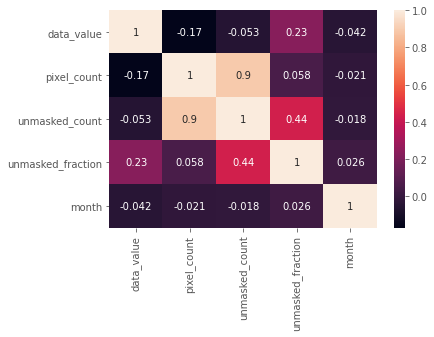

In [34]:
df_msavi_mean_corr = df_msavi_mean.drop(['observation_date', 'cultivation_id'], axis = 1)
df_msavi_mean_corr = df_msavi_mean_corr.corr()
sns.heatmap(df_msavi_mean_corr, annot=True)
plt.show()

In *df_msavi_mean*, the *unmasked_fraction* = *unmasked_count* / *pixel_count* , thus we do not really look at the correlation of the three since we know of their relationship. Some of the correlations may seem low but have in mind that these values are not normalised.

Instead we focus on the correlation of the *unmasked_fraction* (since it is normalised) with the *data_value*.

The correlation is 0.23, there is some positive linear relationship but it is weak.

#### df_weather

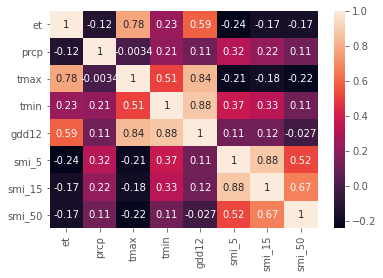

In [35]:
df_weather_corr = df_weather.drop(['observation_date', 'cultivation_id'], axis = 1)
df_weather_corr = df_weather_corr.corr()
sns.heatmap(df_weather_corr, annot=True)
plt.show()

#### data_value, unmasked_fraction with df_weather parameters

We look whether the *data_value* and the *unmasked_fraction* have some relationship with the *df_weather*.

Length of the joined dataframe:  5712


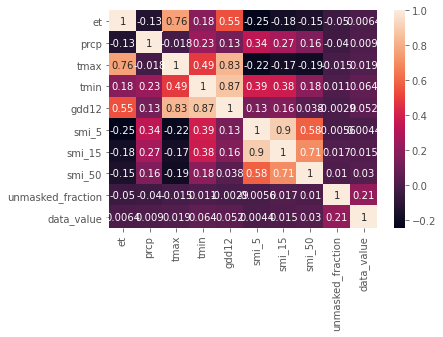

In [36]:
df_weather['observation_date(no_time)'] = df_weather.apply(lambda row: (row['observation_date'].date()), axis=1)
df_msavi_mean['observation_date(no_time)'] = df_msavi_mean.apply(lambda row: (row['observation_date'].date()), axis=1)
df_weather_msavi_corr = pd.merge(df_weather, df_msavi_mean[['unmasked_fraction','data_value','observation_date(no_time)']], on="observation_date(no_time)")


print('Length of the joined dataframe: ', df_weather_msavi_corr.shape[0])
df_weather_msavi_corr = df_weather_msavi_corr.drop(['cultivation_id','observation_date(no_time)',], axis = 1)
df_weather_msavi_corr = df_weather_msavi_corr.corr()
sns.heatmap(df_weather_msavi_corr, annot=True)
plt.show()

*data_value* and *unmasked_fraction* have a low correlation with all the features in *df_weather*. Thus, no linear relationship assumed.

### Reviewing the time-series data

We only have 5 cultivations and thus we are not planning to carry any modelling training since the data is just not enough.
However, underneath we view data that we have as a timeseries in the table *df_msavi_mean* and *df_weather*.


For *df_weather*, we take a look at the *tmax* and *tmin* variables. In the literature the temperature is the most crucial parameter. In *df_msavi_mean*, we look at *data_value*.

Generally, the graphs below work well if you want to view a particular variable over time for the start to harvest date that you have.

In [37]:
def plot_df_2(df, x, y1,y2, start_date, final_date, title="", xlabel='Date', ylabel='Value', dpi=100, color1 = 'tab:red', color2='blue'):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y1, color=color1, linewidth = 1)
    plt.plot(x, y2, color=color2, linewidth = 1)
    plt.axvline(x=[start_date])
    plt.axvline(x=[final_date])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [38]:
def plot_df(df, x, y, start_date, final_date, title="", xlabel='Date', ylabel='Value', dpi=100, color = 'tab:red'):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.axvline(x=[start_date])
    plt.axvline(x=[final_date])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [39]:
df_weather = df_weather.sort_values(by = ['observation_date']).reset_index(drop=True)
df_weather_gb = df_weather.groupby(['cultivation_id'])
df_msavi_mean = df_msavi_mean.sort_values(by =['observation_date']).reset_index(drop = True)
df_msavi_mean_gb = df_msavi_mean.groupby(['cultivation_id'])

#### df_weather

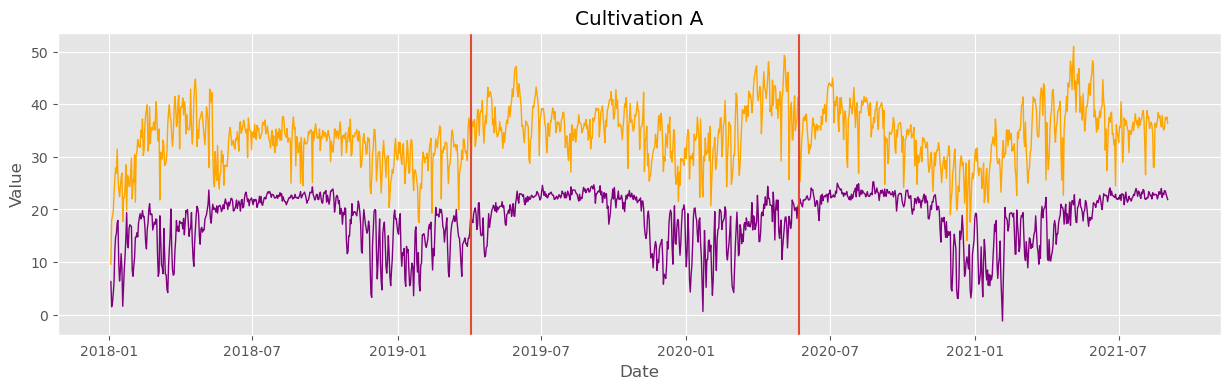

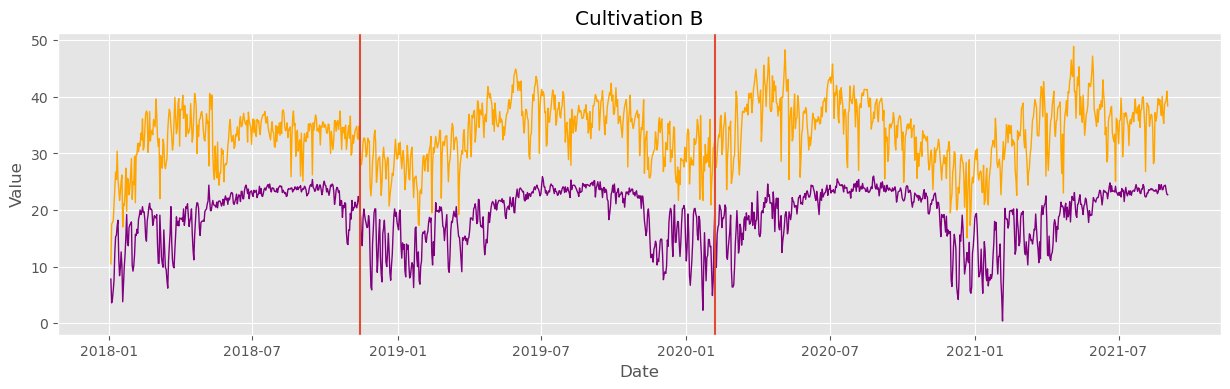

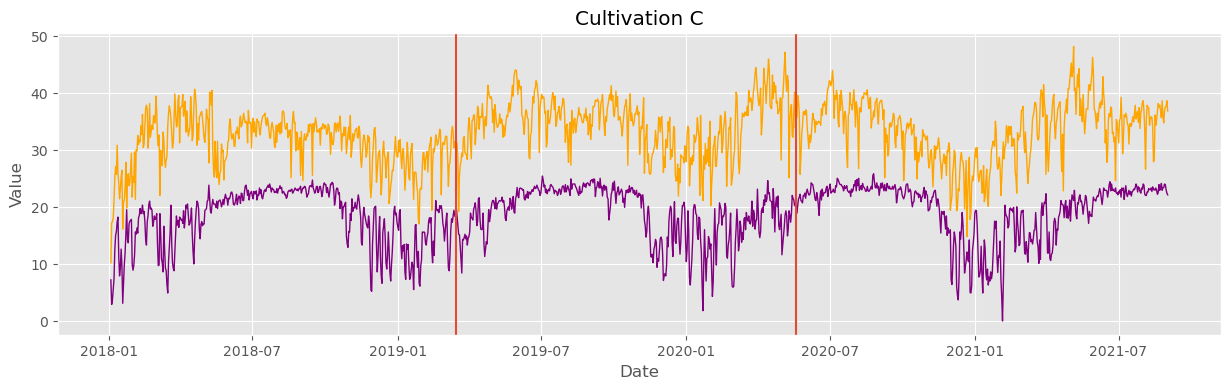

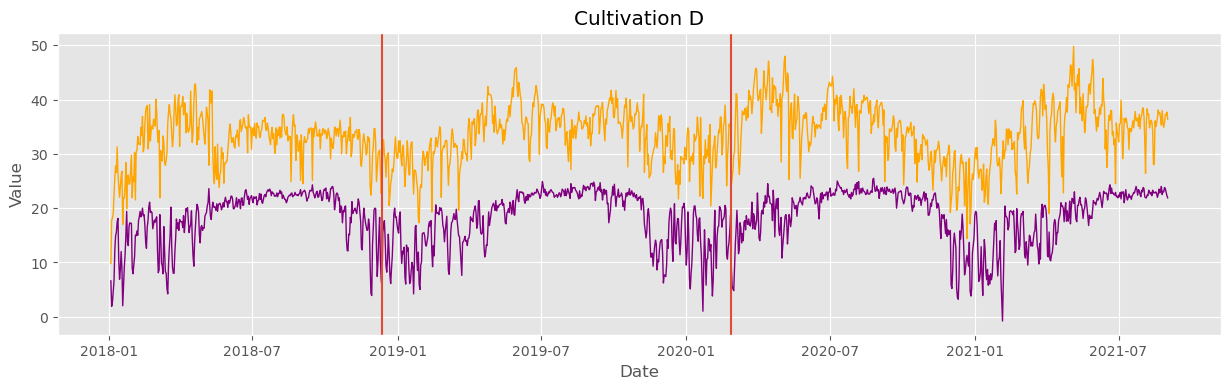

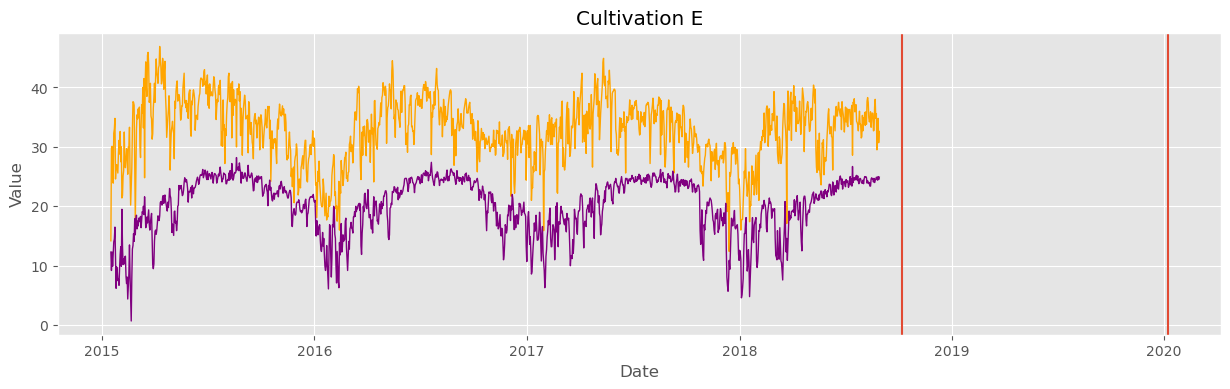

In [40]:
plot_df_2(df_weather_gb.get_group(18902), x=df_weather_gb.get_group(18902)['observation_date'], y1 = df_weather_gb.get_group(18902)['tmax'],  y2 = df_weather_gb.get_group(18902)['tmin'], title = "Cultivation A", start_date=df_cultivations[df_cultivations['cultivation_id']==18902]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==18902]['harvest date'], color1='orange', color2='purple')
plot_df_2(df_weather_gb.get_group(18932), x=df_weather_gb.get_group(18932)['observation_date'], y1 = df_weather_gb.get_group(18932)['tmax'],  y2 = df_weather_gb.get_group(18932)['tmin'], title = "Cultivation B", start_date=df_cultivations[df_cultivations['cultivation_id']==18932]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==18932]['harvest date'], color1='orange', color2='purple')
plot_df_2(df_weather_gb.get_group(19009), x=df_weather_gb.get_group(19009)['observation_date'], y1 = df_weather_gb.get_group(19009)['tmax'],  y2 = df_weather_gb.get_group(19009)['tmin'], title = "Cultivation C", start_date=df_cultivations[df_cultivations['cultivation_id']==19009]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==19009]['harvest date'], color1='orange', color2='purple')
plot_df_2(df_weather_gb.get_group(19030), x=df_weather_gb.get_group(19030)['observation_date'], y1 = df_weather_gb.get_group(19030)['tmax'],  y2 = df_weather_gb.get_group(19030)['tmin'], title = "Cultivation D", start_date=df_cultivations[df_cultivations['cultivation_id']==19030]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==19030]['harvest date'], color1='orange', color2='purple')
plot_df_2(df_weather_gb.get_group(19129), x=df_weather_gb.get_group(19129)['observation_date'], y1 = df_weather_gb.get_group(19129)['tmax'],  y2 = df_weather_gb.get_group(19129)['tmin'], title = "Cultivation E", start_date=df_cultivations[df_cultivations['cultivation_id']==19129]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==19129]['harvest date'], color1='orange', color2='purple')

Firstly, we see the cultivation E data in df_weather stops before the *grow start date*. As a result, we expect this instance to be missing a lot of features in the next stage.
Another thing that we observe is that the temperatures are similar for the cultivations A, B, C and D. We will take a closer look at that later.

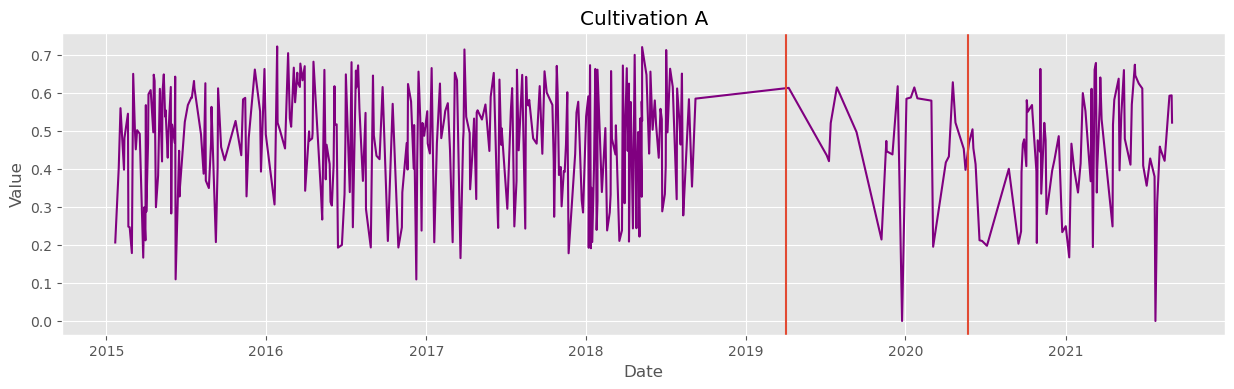

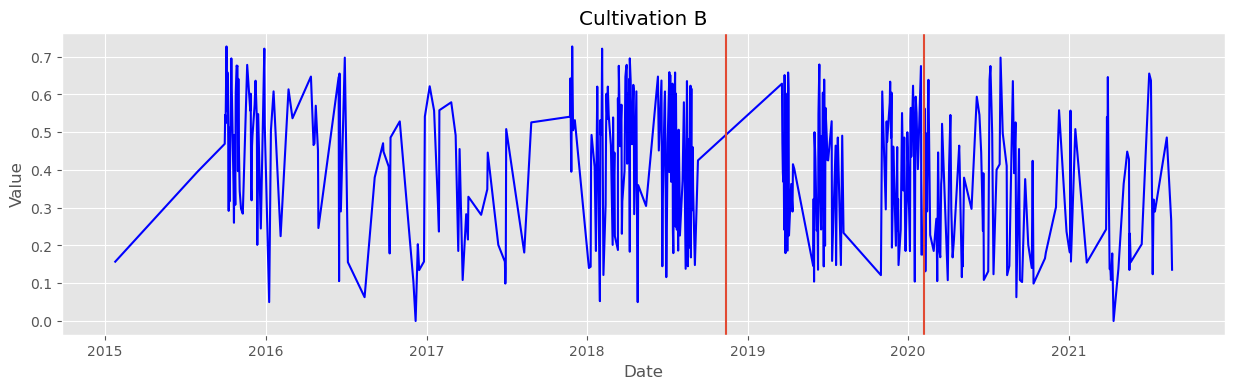

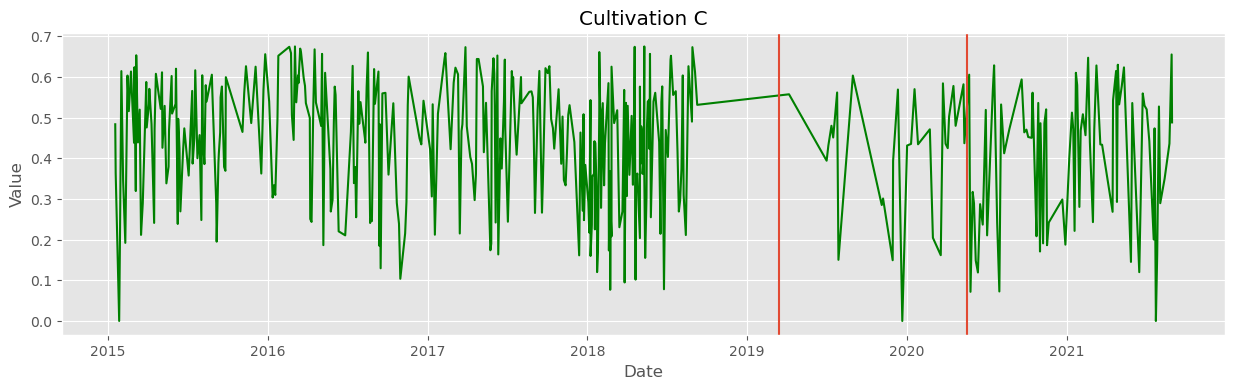

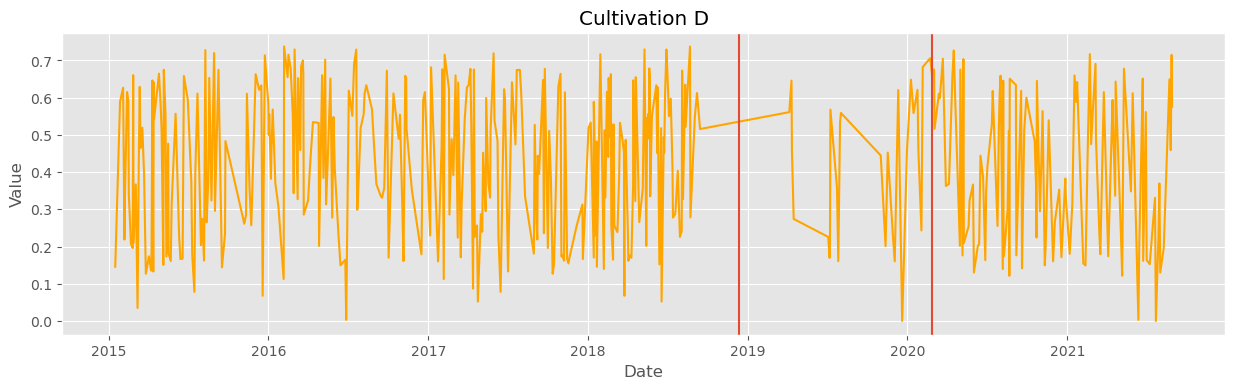

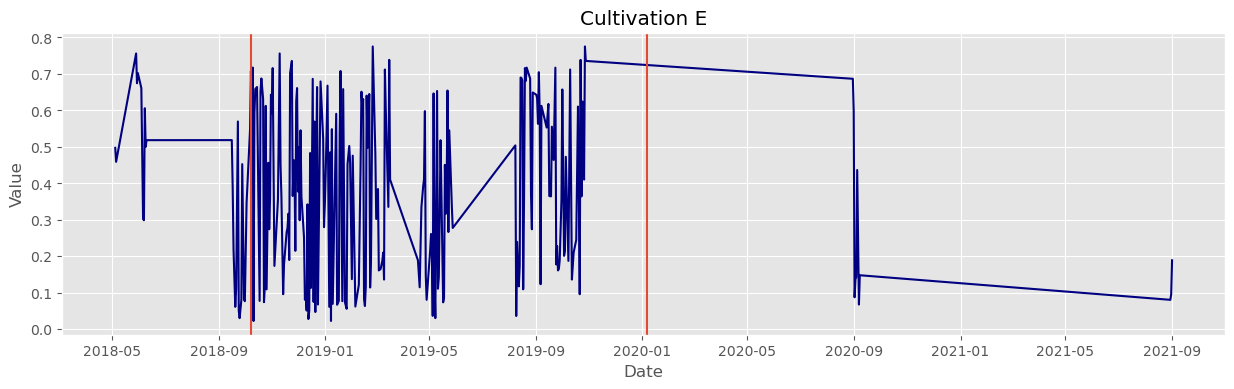

In [41]:
plot_df(df_msavi_mean_gb.get_group(18902), x=df_msavi_mean_gb.get_group(18902)['observation_date'], y = df_msavi_mean_gb.get_group(18902)['data_value'], title = "Cultivation A", start_date=df_cultivations[df_cultivations['cultivation_id']==18902]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==18902]['harvest date'], color='purple')
plot_df(df_msavi_mean_gb.get_group(18932), x=df_msavi_mean_gb.get_group(18932)['observation_date'], y = df_msavi_mean_gb.get_group(18932)['data_value'], title = "Cultivation B", start_date=df_cultivations[df_cultivations['cultivation_id']==18932]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==18932]['harvest date'],color = 'blue')
plot_df(df_msavi_mean_gb.get_group(19009), x=df_msavi_mean_gb.get_group(19009)['observation_date'], y = df_msavi_mean_gb.get_group(19009)['data_value'], title = "Cultivation C", start_date=df_cultivations[df_cultivations['cultivation_id']==19009]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==19009]['harvest date'],color = 'green')
plot_df(df_msavi_mean_gb.get_group(19030), x=df_msavi_mean_gb.get_group(19030)['observation_date'], y = df_msavi_mean_gb.get_group(19030)['data_value'], title = "Cultivation D", start_date=df_cultivations[df_cultivations['cultivation_id']==19030]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==19030]['harvest date'],color = 'orange')
plot_df(df_msavi_mean_gb.get_group(19129), x=df_msavi_mean_gb.get_group(19129)['observation_date'], y = df_msavi_mean_gb.get_group(19129)['data_value'], title = "Cultivation E", start_date=df_cultivations[df_cultivations['cultivation_id']==19129]['grow start date'], final_date=df_cultivations[df_cultivations['cultivation_id']==19129]['harvest date'],color = 'navy')


Here we notice that the data provided is highly inconsistent. There are some big gaps between the time series. Regadless, Cultivation E may seem the cultivation with the least amount of data, but it has the least amount of gaps between its *grow start date* and *harvest date* making it one of the most relevant entry in this context.

### Looking at distributions and feature ideas

We look at the distribution of *data_value* column in *df_msavi_mean*. 

In [42]:
df_msavi_mean['month']= df_msavi_mean['observation_date'].dt.month
df_msavi_mean['season'] = df_msavi_mean.apply(lambda row: get_season(row), axis=1)

Text(0.5, 1.0, 'data_value, Distribution')

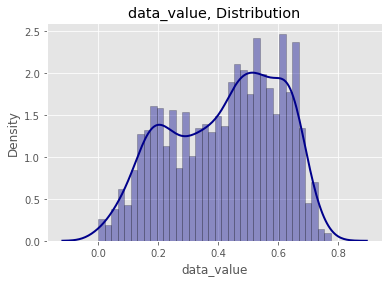

In [43]:
sns.distplot(df_msavi_mean['data_value'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('data_value, Distribution')

In [44]:
df_msavi_mean['data_value'].describe()

count    1934.000000
mean        0.421985
std         0.181896
min         0.000015
25%         0.269091
50%         0.451132
75%         0.572860
max         0.775386
Name: data_value, dtype: float64

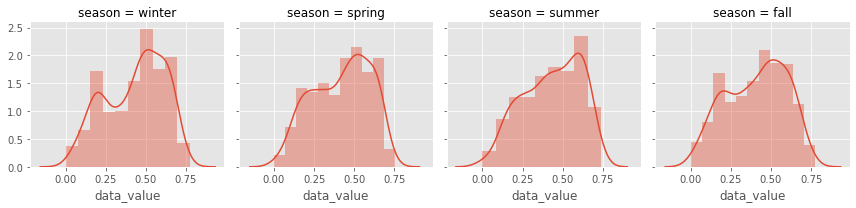

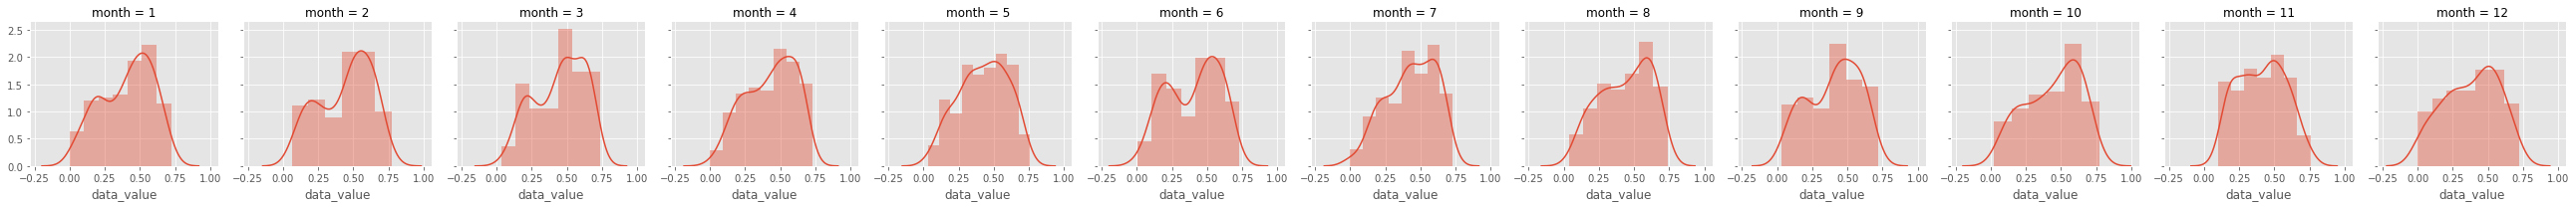

In [45]:
g = sns.FacetGrid(df_msavi_mean, col="season")
g.map(sns.distplot, "data_value")
g = sns.FacetGrid(df_msavi_mean, col="month")
g.map(sns.distplot, "data_value")

Interesting to see that the shape of the distribution remains similar throughout the year.

### Based on Temperature

#### Scatter plot tmax-tmin per season

We have seen the time-series analysis above regarding *tmax* and *tmin*, and the correlation matrix suggest some association between the two, thus let us see a scatter plot per season.

In [46]:
df_weather['month']= df_weather['observation_date'].dt.month
df_weather['season'] = df_weather.apply(lambda row: get_season(row), axis=1)

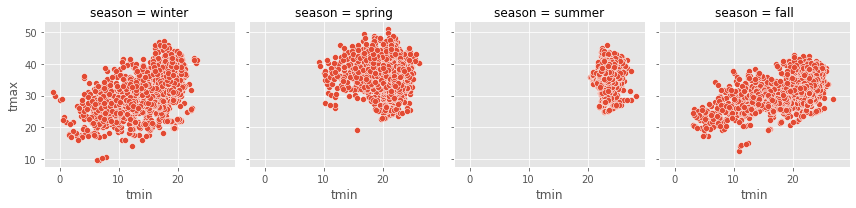

In [47]:
g = sns.FacetGrid(df_weather, col="season")
g.map(sns.scatterplot, "tmin", "tmax")

We can indeed see that the two hold a positive association. This can be seen to the lack of points on the negative area (top-left and bottom-right corners).

#### Analysing max temperature

Distribution:

Text(0.5, 1.0, 'Max.Temperature, Distribution')

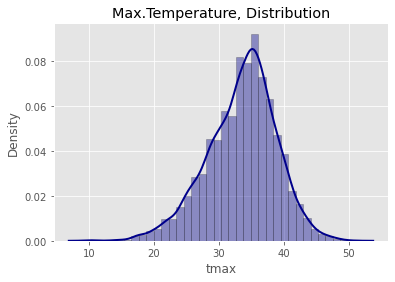

In [48]:
sns.distplot(df_weather['tmax'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('Max.Temperature, Distribution')

Bell-shaped, seems normal distribution by glance.

In [49]:
df_weather['tmax'].describe()

count    6674.000000
mean       33.493197
std         5.320055
min         9.600000
25%        30.200000
50%        34.100000
75%        37.000000
max        51.000000
Name: tmax, dtype: float64

Distribution per season

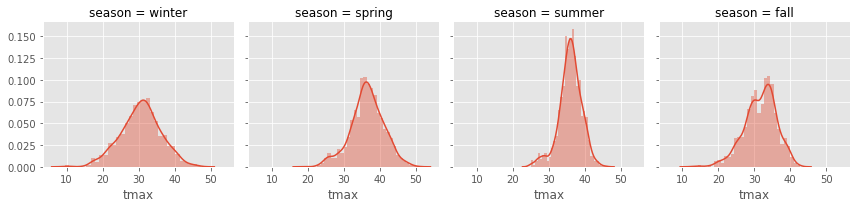

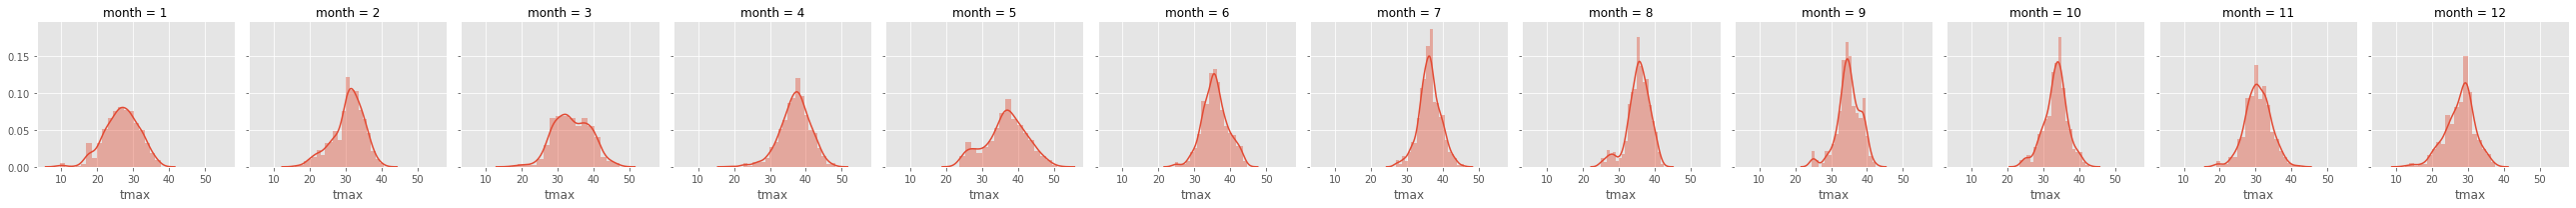

In [50]:
g = sns.FacetGrid(df_weather, col="season")
g.map(sns.distplot, "tmax")
g = sns.FacetGrid(df_weather, col="month")
g.map(sns.distplot, "tmax")

They all seem to hold a bell-shape.

We can see some major differences on the mean of max temperature per season, especially during summer. This is to be expected but it also is an indication that it would be a better idea to consider the temperature per season or month instead of the annual average.

Below we break down the distribution per months. Most of the distributions agree with the corresponding season. The biggest diversity in terms of shape is found in the months of spring.

#### Analysing min temperature

Distribution:

Text(0.5, 1.0, 'Min.Temperature, Distribution')

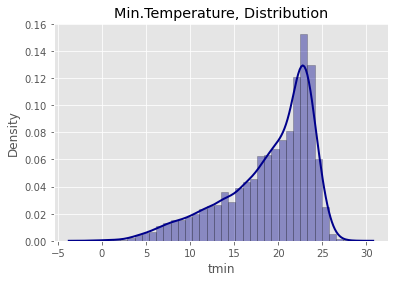

In [51]:
sns.distplot(df_weather['tmin'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('Min.Temperature, Distribution')

Clearly a Left-Skewed distribution (Negative Skewness). Interesting to see that this difference from max temperature.

In [52]:
df_weather['tmin'].describe()

count    6674.000000
mean       18.981001
std         4.965050
min        -1.200000
25%        16.200000
50%        20.500000
75%        22.800000
max        28.200000
Name: tmin, dtype: float64

Distribution per season:

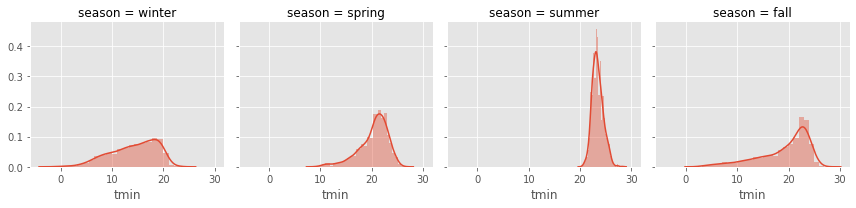

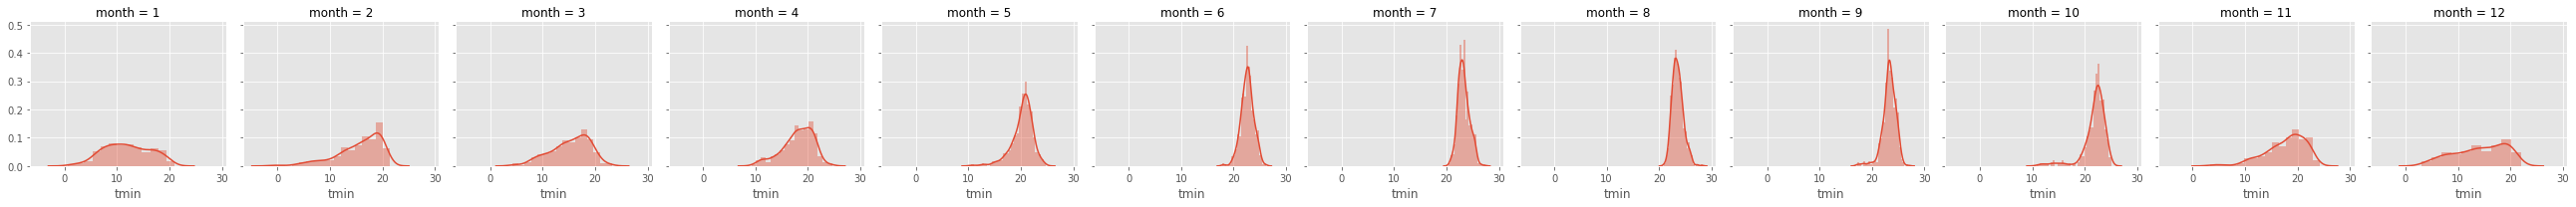

In [53]:
g = sns.FacetGrid(df_weather, col="season")
g.map(sns.distplot, "tmin")
g = sns.FacetGrid(df_weather, col="month")
g.map(sns.distplot, "tmin")

The distributions between the four seasons are very different. Despite the value differences, every season except summer seems to be holding a left-skewed distribution while Summer has a bell-shaped distribution. This was sort of unexpected since the time-series in the previous section, suggested *tmax* and *tmin* to have a similar distribution throughout the year.

This strengthens our point to include features related to temperature for each season or month instead of the annual.

The change every month is much smoother. You can see the mean slowly rising during summer months and slowly descending during winter.

#### Analysing GGD12

A simple way to think of this is: 

GGD12 = ((tmax-tmin)/2) - 12

This is a variation of average temperature, and thus we do not need to calculate the average temperature as an extra feature.

Distribution:

Text(0.5, 1.0, 'GDD12 Days, Distribution')

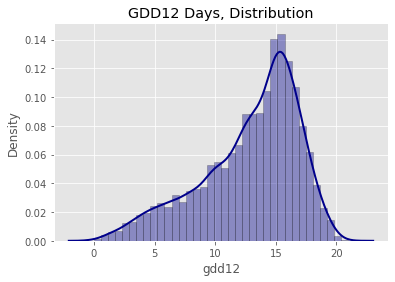

In [54]:
sns.distplot(df_weather['gdd12'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('GDD12 Days, Distribution')

In [55]:
df_weather['gdd12'].describe()

count    6674.000000
mean       12.881871
std         4.009210
min         0.000000
25%        10.475000
50%        13.854167
75%        15.824702
max        20.961905
Name: gdd12, dtype: float64

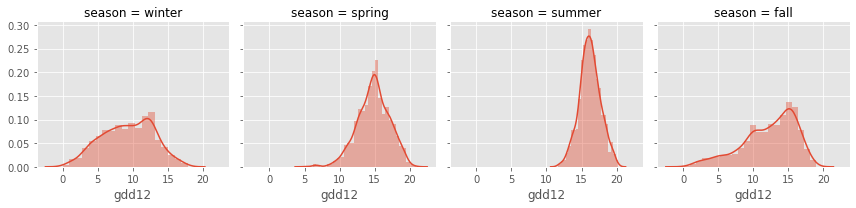

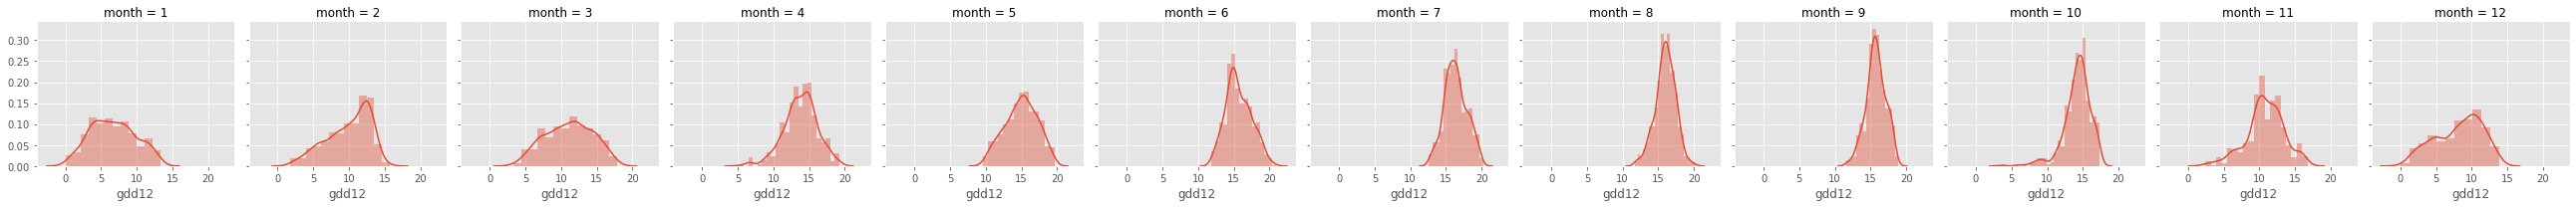

In [56]:
g = sns.FacetGrid(df_weather, col="season")
g.map(sns.distplot, "gdd12")
g = sns.FacetGrid(df_weather, col="month")
g.map(sns.distplot, "gdd12")

Same arguement.

### Precipitation

Scatter plot gdd12 and precipitation. We expect low gdd12 to have higher precipitation.

Text(0.5, 1.0, 'Precipitation vs GDD12')

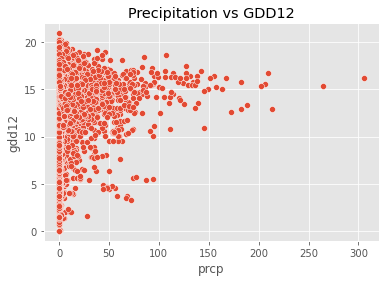

In [57]:
sns.scatterplot(data=df_weather, x=df_weather['prcp'], y=df_weather['gdd12']).set_title('Precipitation vs GDD12')

The graph is inconclusive. This is due to the high number of zeros on the precipitation data.

Distribution:

Text(0.5, 1.0, 'Precipitationn, Distribution')

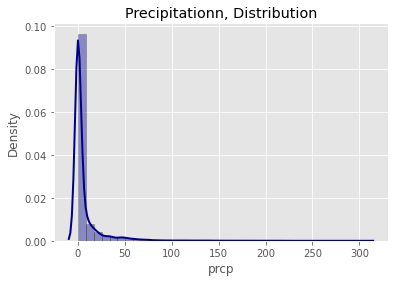

In [58]:
sns.distplot(df_weather['prcp'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('Precipitationn, Distribution')

From [4], we can explore further and look at the number of wet days, defined by the number of days that had more than 0.2 mm of rain.


In [59]:
df_weather_gb_month = df_weather.groupby('month')
df_Weather_wetdays_per_month = pd.DataFrame(columns= ['Number of wet days (normalised)', 'Month'])
for i in df_weather_gb_month.groups.keys():
    temp = df_weather_gb_month.get_group(i)
    no_of_wet_days_norm = len(temp[temp['prcp']>=0.2])/len(temp)
    values_to_add = {'Month': i, 'Number of wet days (normalised)':no_of_wet_days_norm}
    row_to_add = pd.Series(values_to_add)
    df_Weather_wetdays_per_month = df_Weather_wetdays_per_month.append(row_to_add, ignore_index=True)

Text(0.5, 1.0, 'Wet Days per month')

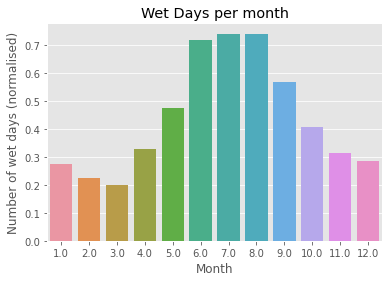

In [60]:
sns.barplot(x=df_Weather_wetdays_per_month['Month'], y=df_Weather_wetdays_per_month['Number of wet days (normalised)']).set_title('Wet Days per month')

### Soil Moisture

"Use of soil moisture data for refined GreenSeeker sensor based nitrogene recommendations in winter wheat" states that soil moisture at the 5-cm length is the strongest indicator while also stating that at top layers, soil moisture is variable because it is affected by environmental changes.

#### At 5 cm

Text(0.5, 1.0, 'Soil Moisture at 5 cm, Distribution')

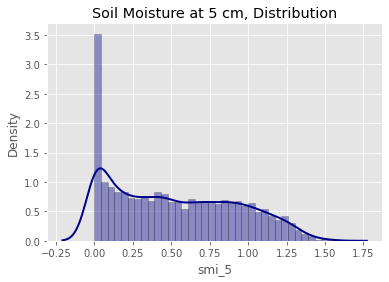

In [61]:
sns.distplot(df_weather['smi_5'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('Soil Moisture at 5 cm, Distribution')

In [62]:
df_weather['smi_5'].describe()

count    6674.000000
mean        0.521945
std         0.403067
min         0.000000
25%         0.145750
50%         0.473300
75%         0.854522
max         1.563625
Name: smi_5, dtype: float64

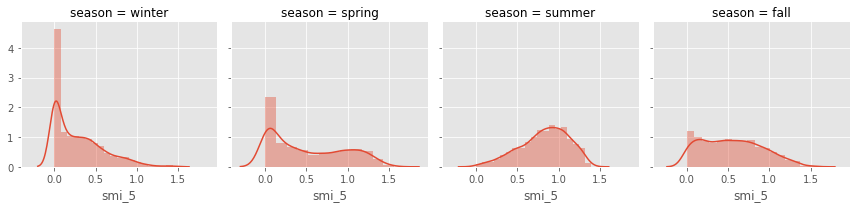

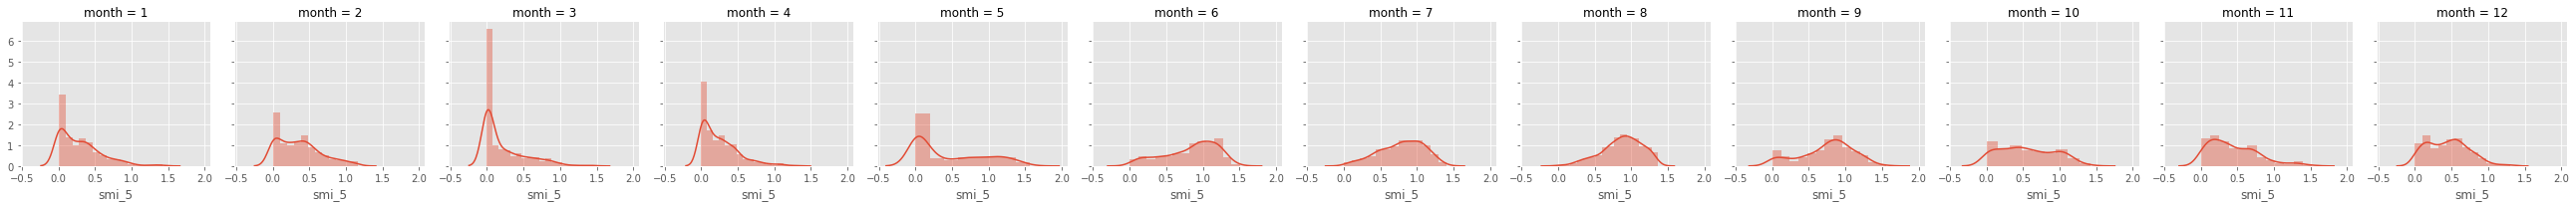

In [63]:
g = sns.FacetGrid(df_weather, col="season")
g.map(sns.distplot, "smi_5")
g = sns.FacetGrid(df_weather, col="month")
g.map(sns.distplot, "smi_5")

We have seen in the correlation analysis that there is some linear association between precipitation and soil moisture. Thus as there is not enough precipitation during winter, the distribution of soil moisture is right-skewed (many 0 values).

This does not occur during Summer where precipitation is at higher levels.



#### Soil Moisture 5 vs 15 vs 50

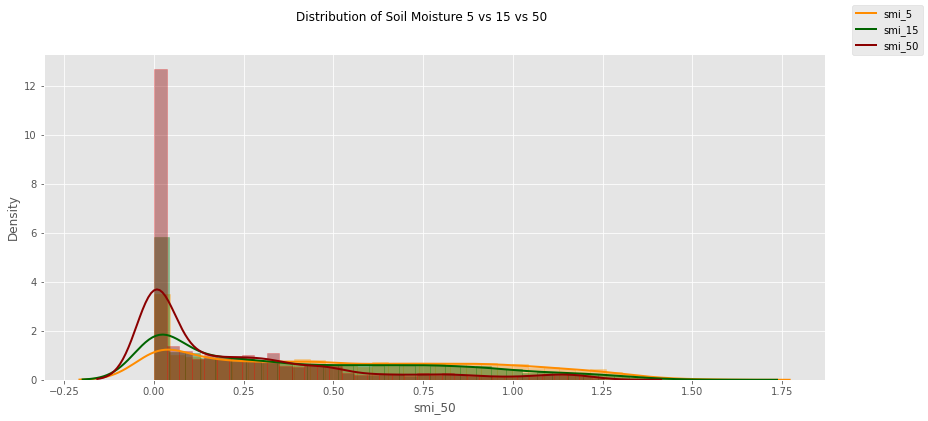

In [64]:
fig = plt.figure(figsize=(14,6))
sns.distplot(df_weather['smi_5'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth': 2})

sns.distplot(df_weather['smi_15'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 2})

sns.distplot(df_weather['smi_50'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2})
fig.suptitle("Distribution of Soil Moisture 5 vs 15 vs 50")
fig.legend(labels=['smi_5','smi_15','smi_50'])

It is only logical that the three are connected, we have seen that in the correlation analysis as well.

Looking at the graph we can see that all three distributions are skewed. The higher the length, the more 0 values and thus the more skewed the distribution is.

### Humidity

#### Evapotranspiration

[1] states that Humidity is also an important factor. From out data, ET is precisely the closest measurement when it comes to humidity.

Text(0.5, 1.0, 'ET, Distribution')

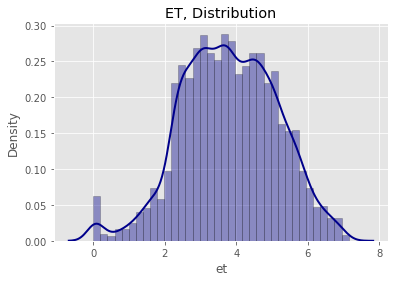

In [65]:
sns.distplot(df_weather['et'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set_title('ET, Distribution')

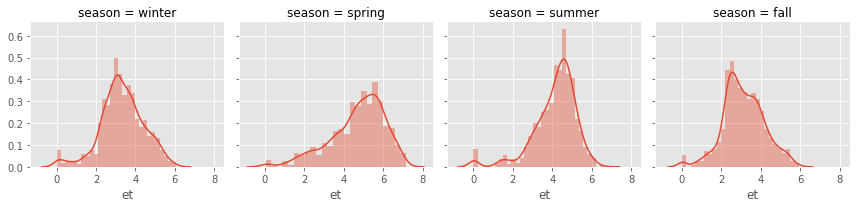

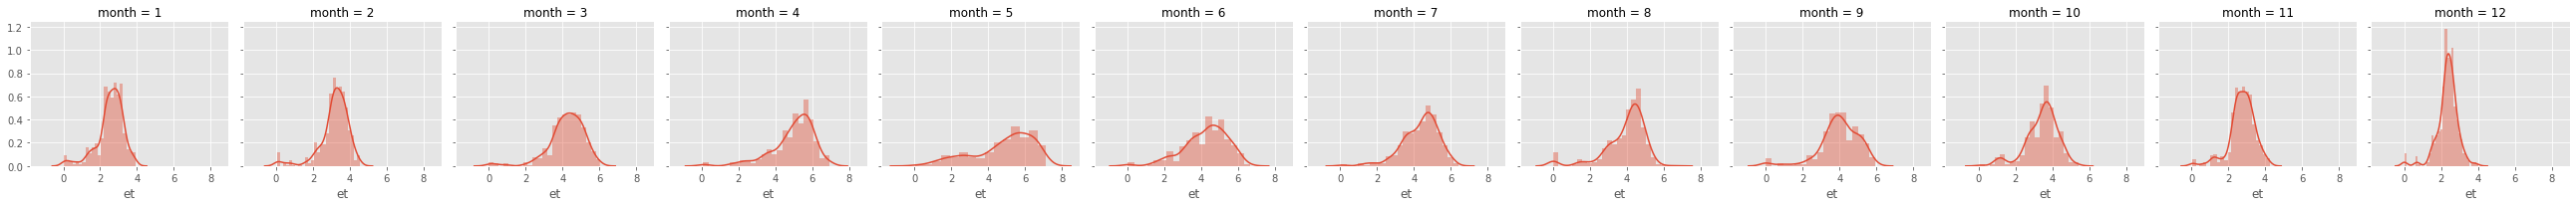

In [66]:
g = sns.FacetGrid(df_weather, col="season")
g.map(sns.distplot, "et")
g = sns.FacetGrid(df_weather, col="month")
g.map(sns.distplot, "et")

## Feature Engineering

Van Klompenburg et al [1], have scanned the relevant papers that deal with machine learning in crop yield prediction. The most used feature is temperature with 24 papers, soil type and rainfall tied second with 17, crop information fourth with 13 and soil maps fifth with 12. In most papers, they do not combine these features into single, abstract features but they keep them as stand alone [1,2,3,4].

We need to keep in mind that random forest is not a statistical model that reflects time-series well. As a result, the features need to be engineered in a way that will reflect the time aspect. By what we have seen above, the data given differs during each season and thus it is not enough to keep a single mean for each characteristic provided [1,2,3,4]. In the papers provided, researchers tend to use a feature multiple times, once for each months.  In my opinion, this is definitely a way that the Random Forest predictor can inherit the time aspect. The only issue is that the dependent variables may not be fully independent since they represent the same thing but in different times. Some authors even use the monthly cumulative amount [3]. We will not use this since in our situation, the start and harvest dates are not standard (i.e. the start date is not every September for example). This may lead to inconsistencies that may introduce noise to our data.

Below I am not using the *unmasked_fraction* column. This could be used as an indication on weather the cultivation has received enough light or not. However, I believe that there is not enough data to understand the feature further. For instance, at what time were the images taken? If an image has lost its value from the clouds, it doesn't mean that the weather was cloudy all day long. The rest of the features were used.

Since there is not enough weather data for Cultivation E, we choose to not include it in our final sample.

In [67]:
df_weather_exclude_19129 = df_weather[df_weather['cultivation_id']!=19129].reset_index(drop=True)
df_cultivations_exclude_19129 = df_cultivations[df_cultivations['cultivation_id']!=19129].reset_index(drop=True)

### Average Minimum Temperature (Monthly)

Average Minimum Temperature between the *grow start date* and the *harvest date*, 12 features, 1 for each month.

In [68]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_tmin = pd.DataFrame(columns= ['cultivation_id', 'average_min_temp_jan', 'average_min_temp_feb',
                                                     'average_min_temp_mar','average_min_temp_apr','average_min_temp_may',
                                                     'average_min_temp_jun','average_min_temp_jul','average_min_temp_aug',
                                                     'average_min_temp_sep','average_min_temp_oct','average_min_temp_nov',
                                                     'average_min_temp_dec'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_min_temp_jan = temp[temp['month']==1]['tmin'].mean()
    average_min_temp_feb= temp[temp['month']==2]['tmin'].mean()
    average_min_temp_mar= temp[temp['month']==3]['tmin'].mean()
    average_min_temp_apr= temp[temp['month']==4]['tmin'].mean()
    average_min_temp_may= temp[temp['month']==5]['tmin'].mean()
    average_min_temp_jun= temp[temp['month']==6]['tmin'].mean()
    average_min_temp_jul= temp[temp['month']==7]['tmin'].mean()
    average_min_temp_aug= temp[temp['month']==8]['tmin'].mean()
    average_min_temp_sep= temp[temp['month']==9]['tmin'].mean()
    average_min_temp_oct= temp[temp['month']==10]['tmin'].mean()
    average_min_temp_nov= temp[temp['month']==11]['tmin'].mean()
    average_min_temp_dec= temp[temp['month']==12]['tmin'].mean()
    values_to_add = {'average_min_temp_jan': average_min_temp_jan, 'average_min_temp_feb':average_min_temp_feb, 
                        'average_min_temp_mar': average_min_temp_mar, 'average_min_temp_apr':average_min_temp_apr, 'average_min_temp_may':average_min_temp_may, 
                        'average_min_temp_jun': average_min_temp_jun, 'average_min_temp_jul':average_min_temp_jul, 'average_min_temp_aug':average_min_temp_aug, 
                        'average_min_temp_sep': average_min_temp_sep, 'average_min_temp_oct':average_min_temp_oct, 'average_min_temp_nov':average_min_temp_nov, 
                        'average_min_temp_dec':average_min_temp_dec, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_tmin = result_tmin.append(row_to_add, ignore_index=True)

In [69]:
result_tmin

,cultivation_id,average_min_temp_jan,average_min_temp_feb,average_min_temp_mar,average_min_temp_apr,average_min_temp_may,average_min_temp_jun,average_min_temp_jul,average_min_temp_aug,average_min_temp_sep,average_min_temp_oct,average_min_temp_nov,average_min_temp_dec
0,18902.0,12.641935,13.920690,16.025806,18.210526,19.088679,22.383333,22.761290,23.080645,22.516667,22.125806,15.483333,14.635484
1,18932.0,12.883871,16.030303,15.470968,17.956667,20.977419,23.106667,23.635484,23.841935,23.370000,22.877419,16.159574,14.969355
2,19009.0,13.264516,14.479310,15.855319,18.546667,19.497959,22.673333,23.141935,23.400000,23.050000,22.506452,15.993333,15.064516
3,19030.0,11.883871,15.642593,14.664516,16.990000,20.077419,22.433333,22.845161,23.161290,22.720000,22.241935,15.656667,14.203922


### Average Maximum Temperature (Monthly)

Average Maximum Temperature between the *grow start date* and the *harvest date*, 12 features, 1 for each month.

In [70]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_tmax = pd.DataFrame(columns= ['cultivation_id', 'average_max_temp_jan', 'average_max_temp_feb',
                                                     'average_max_temp_mar','average_max_temp_apr','average_max_temp_may',
                                                     'average_max_temp_jun','average_max_temp_jul','average_max_temp_aug',
                                                     'average_max_temp_sep','average_max_temp_oct','average_max_temp_nov',
                                                     'average_max_temp_dec'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_max_temp_jan = temp[temp['month']==1]['tmax'].mean()
    average_max_temp_feb= temp[temp['month']==2]['tmax'].mean()
    average_max_temp_mar= temp[temp['month']==3]['tmax'].mean()
    average_max_temp_apr= temp[temp['month']==4]['tmax'].mean()
    average_max_temp_may= temp[temp['month']==5]['tmax'].mean()
    average_max_temp_jun= temp[temp['month']==6]['tmax'].mean()
    average_max_temp_jul= temp[temp['month']==7]['tmax'].mean()
    average_max_temp_aug= temp[temp['month']==8]['tmax'].mean()
    average_max_temp_sep= temp[temp['month']==9]['tmax'].mean()
    average_max_temp_oct= temp[temp['month']==10]['tmax'].mean()
    average_max_temp_nov= temp[temp['month']==11]['tmax'].mean()
    average_max_temp_dec= temp[temp['month']==12]['tmax'].mean()
    values_to_add = {'average_max_temp_jan': average_max_temp_jan, 'average_max_temp_feb':average_max_temp_feb, 
                        'average_max_temp_mar': average_max_temp_mar, 'average_max_temp_apr':average_max_temp_apr, 'average_max_temp_may':average_max_temp_may, 
                        'average_max_temp_jun': average_max_temp_jun, 'average_max_temp_jul':average_max_temp_jul, 'average_max_temp_aug':average_max_temp_aug, 
                        'average_max_temp_sep': average_max_temp_sep, 'average_max_temp_oct':average_max_temp_oct, 'average_max_temp_nov':average_max_temp_nov, 
                        'average_max_temp_dec':average_max_temp_dec, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_tmax = result_tmax.append(row_to_add, ignore_index=True)

In [71]:
result_tmax

,cultivation_id,average_max_temp_jan,average_max_temp_feb,average_max_temp_mar,average_max_temp_apr,average_max_temp_may,average_max_temp_jun,average_max_temp_jul,average_max_temp_aug,average_max_temp_sep,average_max_temp_oct,average_max_temp_nov,average_max_temp_dec
0,18902.0,31.325806,31.786207,38.541935,39.542105,38.752830,37.583333,36.629032,34.438710,37.663333,37.335484,33.273333,30.390323
1,18932.0,28.343548,29.387879,30.716129,36.836667,37.687097,38.076667,38.012903,35.451613,38.140000,36.600000,31.127660,28.804839
2,19009.0,29.667742,30.282759,33.910638,37.430000,37.369388,37.116667,36.887097,34.367742,37.156667,36.061290,31.713333,29.345161
3,19030.0,28.961290,30.931481,30.148387,36.610000,37.296774,37.266667,36.570968,34.229032,37.346667,36.770968,32.630000,29.203922


### Average GDD12 (Monthly)

This is a metric for average temperature between the *grow start date* and the *harvest date*. Might be more important than maximum and minimum. Worth including monthly, 12 columns.

In [72]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_gdd12 = pd.DataFrame(columns= ['cultivation_id', 'average_gdd12_jan', 'average_gdd12_feb',
                                                     'average_gdd12_mar','average_gdd12_apr','average_gdd12_may',
                                                     'average_gdd12_jun','average_gdd12_jul','average_gdd12_aug',
                                                     'average_gdd12_sep','average_gdd12_oct','average_gdd12_nov',
                                                     'average_gdd12_dec'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_gdd12_jan = temp[temp['month']==1]['gdd12'].mean()
    average_gdd12_feb= temp[temp['month']==2]['gdd12'].mean()
    average_gdd12_mar= temp[temp['month']==3]['gdd12'].mean()
    average_gdd12_apr= temp[temp['month']==4]['gdd12'].mean()
    average_gdd12_may= temp[temp['month']==5]['gdd12'].mean()
    average_gdd12_jun= temp[temp['month']==6]['gdd12'].mean()
    average_gdd12_jul= temp[temp['month']==7]['gdd12'].mean()
    average_gdd12_aug= temp[temp['month']==8]['gdd12'].mean()
    average_gdd12_sep= temp[temp['month']==9]['gdd12'].mean()
    average_gdd12_oct= temp[temp['month']==10]['gdd12'].mean()
    average_gdd12_nov= temp[temp['month']==11]['gdd12'].mean()
    average_gdd12_dec= temp[temp['month']==12]['gdd12'].mean()
    values_to_add = {'average_gdd12_jan': average_gdd12_jan, 'average_gdd12_feb':average_gdd12_feb, 
                        'average_gdd12_mar': average_gdd12_mar, 'average_gdd12_apr':average_gdd12_apr, 'average_gdd12_may':average_gdd12_may, 
                        'average_gdd12_jun': average_gdd12_jun, 'average_gdd12_jul':average_gdd12_jul, 'average_gdd12_aug':average_gdd12_aug, 
                        'average_gdd12_sep': average_gdd12_sep, 'average_gdd12_oct':average_gdd12_oct, 'average_gdd12_nov':average_gdd12_nov, 
                        'average_gdd12_dec':average_gdd12_dec, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_gdd12 = result_gdd12.append(row_to_add, ignore_index=True)

In [73]:
result_gdd12

,cultivation_id,average_gdd12_jan,average_gdd12_feb,average_gdd12_mar,average_gdd12_apr,average_gdd12_may,average_gdd12_jun,average_gdd12_jul,average_gdd12_aug,average_gdd12_sep,average_gdd12_oct,average_gdd12_nov,average_gdd12_dec
0,18902.0,8.817258,9.726437,13.647359,14.767262,15.074663,16.163889,15.909409,15.301210,16.591389,15.794662,10.595583,9.292608
1,18932.0,7.570874,9.474167,9.865498,13.704167,15.566071,16.702361,16.946505,16.047984,17.132083,15.850538,10.125897,8.696989
2,19009.0,8.445699,9.446264,11.656722,14.242192,14.883929,16.185694,16.286022,15.418280,16.718889,15.534505,10.286456,9.124462
3,19030.0,7.558078,9.934228,9.330265,13.274583,15.036406,16.108333,15.966398,15.266129,16.604722,15.674194,10.462261,8.634477


### Evapotranspiration (Average)

The average evapotranspiration between the *grow start date* and the *harvest date* , 1 column

In [74]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_et = pd.DataFrame(columns= ['cultivation_id', 'average_et'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_et = temp['et'].mean()
    values_to_add = {'average_et': average_et, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_et = result_et.append(row_to_add, ignore_index=True)

In [75]:
result_et

,cultivation_id,average_et
0,18902.0,4.096217
1,18932.0,3.606904
2,19009.0,4.060698
3,19030.0,3.626991


### Precipitation (Average)

Average precipitation between the *grow start date* and the *harvest date*, 1 feature

In [76]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_prcp = pd.DataFrame(columns= ['cultivation_id', 'average_prcp'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_prcp = temp['prcp'].mean()
    values_to_add = {'average_prcp': average_prcp, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_prcp = result_prcp.append(row_to_add, ignore_index=True)

In [77]:
result_prcp

,cultivation_id,average_prcp
0,18902.0,7.476410
1,18932.0,6.429087
2,19009.0,6.462488
3,19030.0,7.246154


### Precipitation Year before grow start date

As [3], suggests, this was used to capture possible climate effects before planting. 1 column.

In [78]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])

result_prcp_before_planting = pd.DataFrame(columns= ['cultivation_id', 'average_prcp_prior'])

for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    start_date = end_date  - np.timedelta64(365,'D')
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_prcp = temp['prcp'].mean()
    values_to_add = {'average_prcp_prior': average_prcp, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_prcp_before_planting = result_prcp_before_planting.append(row_to_add, ignore_index=True)

In [79]:
result_prcp_before_planting

,cultivation_id,average_prcp_prior
0,18902.0,8.122575
1,18932.0,8.908635
2,19009.0,8.643205
3,19030.0,8.747959


### No. of Wet Days between grow start and harvest date

According to [4], the number of days which an amount of 0.2mm or more of rain is recorded. 1 column

In [80]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_wet_days = pd.DataFrame(columns= ['cultivation_id','Number of wet days (normalised)'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    no_of_wet_days_norm = len(temp[temp['prcp']>=0.2])/len(temp)
    values_to_add = {'Number of wet days (normalised)':no_of_wet_days_norm, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_wet_days = result_wet_days.append(row_to_add, ignore_index=True)

In [81]:
result_wet_days

,cultivation_id,Number of wet days (normalised)
0,18902.0,0.423019
1,18932.0,0.429746
2,19009.0,0.419283
3,19030.0,0.445441


### Moisture 3-months from grow start date

The soil moisture is suggested to be a crucial factor [1]. To my understanding, we need to seperate the soil moisture at the beginning of growth as a separate feature as this may be more crucial. 

Thus, we record the average soil moisture between the *grow start date* and 3 months later. 1x3 Columns (3 depths)

#### smi_5

In [82]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_smi_5_3_months_grow_date = pd.DataFrame(columns= ['cultivation_id', 'average_smi_5_prior'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = np.datetime64(pd.Timestamp(start_date) + pd.DateOffset(months=3))
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_smi = temp['smi_5'].mean()
    values_to_add = {'average_smi_5_prior': average_smi, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_smi_5_3_months_grow_date = result_smi_5_3_months_grow_date.append(row_to_add, ignore_index=True)

In [83]:
result_smi_5_3_months_grow_date

,cultivation_id,average_smi_5_prior
0,18902.0,0.545024
1,18932.0,0.382925
2,19009.0,0.512651
3,19030.0,0.481457


#### smi_15

In [84]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_smi_15_3_months_grow_date = pd.DataFrame(columns= ['cultivation_id', 'average_smi_15_prior'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = np.datetime64(pd.Timestamp(start_date) + pd.DateOffset(months=3))
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_smi = temp['smi_15'].mean()
    values_to_add = {'average_smi_15_prior': average_smi, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_smi_15_3_months_grow_date = result_smi_15_3_months_grow_date.append(row_to_add, ignore_index=True)

In [85]:
result_smi_15_3_months_grow_date

,cultivation_id,average_smi_15_prior
0,18902.0,0.422401
1,18932.0,0.305595
2,19009.0,0.366084
3,19030.0,0.488210


#### smi_50

In [86]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_smi_50_3_months_grow_date = pd.DataFrame(columns= ['cultivation_id', 'average_smi_50_prior'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    end_date = np.datetime64(pd.Timestamp(start_date) + pd.DateOffset(months=3))
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_smi = temp['smi_50'].mean()
    values_to_add = {'average_smi_50_prior': average_smi, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_smi_50_3_months_grow_date = result_smi_50_3_months_grow_date.append(row_to_add, ignore_index=True)

In [87]:
result_smi_50_3_months_grow_date

,cultivation_id,average_smi_50_prior
0,18902.0,0.090010
1,18932.0,0.042796
2,19009.0,0.143867
3,19030.0,0.183034


### Moisture after the 3-month mark

The rest value until the harvest date. 1x3 columns

#### smi_5

In [88]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_smi_5_after_3_months = pd.DataFrame(columns= ['cultivation_id', 'average_smi_5_rest'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    prov_start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    start_date = np.datetime64(pd.Timestamp(prov_start_date) + pd.DateOffset(months=3))
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_smi = temp['smi_5'].mean()
    values_to_add = {'average_smi_5_rest': average_smi, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_smi_5_after_3_months = result_smi_5_after_3_months.append(row_to_add, ignore_index=True)

In [89]:
result_smi_5_after_3_months

,cultivation_id,average_smi_5_rest
0,18902.0,0.359926
1,18932.0,0.426047
2,19009.0,0.395896
3,19030.0,0.471480


#### smi_15

In [90]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_smi_15_after_3_months = pd.DataFrame(columns= ['cultivation_id', 'average_smi_15_rest'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    prov_start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    start_date = np.datetime64(pd.Timestamp(prov_start_date) + pd.DateOffset(months=3))
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_smi = temp['smi_15'].mean()
    values_to_add = {'average_smi_15_rest': average_smi, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_smi_15_after_3_months = result_smi_15_after_3_months.append(row_to_add, ignore_index=True)

In [91]:
result_smi_15_after_3_months

,cultivation_id,average_smi_15_rest
0,18902.0,0.215630
1,18932.0,0.250973
2,19009.0,0.231488
3,19030.0,0.342754


#### smi_50

In [92]:
df_weather_gb = df_weather_exclude_19129.groupby(['cultivation_id'])
result_smi_50_after_3_months = pd.DataFrame(columns= ['cultivation_id', 'average_smi_50_rest'])
for i in df_weather_gb.groups.keys():
    temp = df_weather_gb.get_group(i)
    prov_start_date = df_cultivations[df_cultivations['cultivation_id']==i]['grow start date'].values[0]
    start_date = np.datetime64(pd.Timestamp(prov_start_date) + pd.DateOffset(months=3))
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_smi = temp['smi_50'].mean()
    values_to_add = {'average_smi_50_rest': average_smi, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_smi_50_after_3_months = result_smi_50_after_3_months.append(row_to_add, ignore_index=True)

In [93]:
result_smi_50_after_3_months

,cultivation_id,average_smi_50_rest
0,18902.0,0.096724
1,18932.0,0.010789
2,19009.0,0.062332
3,19030.0,0.131595


### Number of days between grow start and harvest date

I believe the number of days between *grow start date* and *harvest date* is important. For instance if the number of days between the two is 7 days, we would be expecting something to be wrong. 1 column

In [94]:
result_no_days = pd.DataFrame(columns=['cultivation_id', 'number_of_days'])
for index,row in df_cultivations_exclude_19129.iterrows():
    number_of_days = (row['harvest date'] - row['grow start date']).days
    values_to_add = {'number_of_days': number_of_days, 'cultivation_id':row['cultivation_id']}
    row_to_add = pd.Series(values_to_add)
    result_no_days = result_no_days.append(row_to_add, ignore_index=True)

In [95]:
result_no_days

,cultivation_id,number_of_days
0,18902,415
1,18932,449
2,19009,430
3,19030,442


### Average data_value 3-months before harvest

Another feature suggested by myself. This will suggest whether cultivations seem healthy before harvest period. 1 column.

In [96]:
df_msavi_mean_exclude_19129 = df_msavi_mean[df_msavi_mean['cultivation_id']!=19129].reset_index(drop=True)

In [97]:
df_msavi_mean_gb = df_msavi_mean_exclude_19129.groupby(['cultivation_id'])
result_data_value = pd.DataFrame(columns=['cultivation_id', 'average_data_value'])
for i in df_msavi_mean_gb.groups.keys():
    temp = df_msavi_mean_gb.get_group(i)
    end_date = df_cultivations[df_cultivations['cultivation_id']==i]['harvest date'].values[0]
    start_date = np.datetime64(pd.Timestamp(end_date) - pd.DateOffset(months=3))
    mask = (temp['observation_date'] >= start_date) & (temp['observation_date'] <= end_date)
    temp=temp.loc[mask].reset_index(drop=True)
    average_data_value = temp['data_value'].mean()
    values_to_add = {'average_data_value': average_data_value, 'cultivation_id':i}
    row_to_add = pd.Series(values_to_add)
    result_data_value = result_data_value.append(row_to_add, ignore_index=True)

In [98]:
result_data_value

,cultivation_id,average_data_value
0,18902.0,0.452988
1,18932.0,0.396454
2,19009.0,0.444292
3,19030.0,0.465231


### Final Input Dataframe

Concatenating all of the above.

In [99]:
data_frames = [result_tmin, result_tmax, result_gdd12, result_et, result_prcp, result_prcp_before_planting, result_wet_days, result_smi_5_3_months_grow_date, result_smi_15_3_months_grow_date, result_smi_50_3_months_grow_date, result_smi_5_after_3_months, result_smi_15_after_3_months,result_smi_50_after_3_months, result_no_days, result_data_value ]
df_input_final = reduce(lambda  left,right: pd.merge(left,right,on=['cultivation_id'],
                                            how='outer'), data_frames)
df_input_final

,cultivation_id,average_min_temp_jan,average_min_temp_feb,average_min_temp_mar,average_min_temp_apr,average_min_temp_may,average_min_temp_jun,average_min_temp_jul,average_min_temp_aug,average_min_temp_sep,...,average_prcp_prior,Number of wet days (normalised),average_smi_5_prior,average_smi_15_prior,average_smi_50_prior,average_smi_5_rest,average_smi_15_rest,average_smi_50_rest,number_of_days,average_data_value
0,18902.0,12.641935,13.920690,16.025806,18.210526,19.088679,22.383333,22.761290,23.080645,22.516667,...,8.122575,0.423019,0.545024,0.422401,0.090010,0.359926,0.215630,0.096724,415,0.452988
1,18932.0,12.883871,16.030303,15.470968,17.956667,20.977419,23.106667,23.635484,23.841935,23.370000,...,8.908635,0.429746,0.382925,0.305595,0.042796,0.426047,0.250973,0.010789,449,0.396454
2,19009.0,13.264516,14.479310,15.855319,18.546667,19.497959,22.673333,23.141935,23.400000,23.050000,...,8.643205,0.419283,0.512651,0.366084,0.143867,0.395896,0.231488,0.062332,430,0.444292
3,19030.0,11.883871,15.642593,14.664516,16.990000,20.077419,22.433333,22.845161,23.161290,22.720000,...,8.747959,0.445441,0.481457,0.488210,0.183034,0.471480,0.342754,0.131595,442,0.465231


## Discussion

**Progress:**

We have now obtained a dataframe with features for every cultivation. We have ended up with 49 columns where multiple columns highlight the same feature but during different time periods. Wide dataframes are volatile to noise for the main reason being that the more data you have, the more likely is to get data that are not useful. As a result, my suggestion is to use a feature extraction or selection method so as to reduce the dimensions. According to papers, one of the most effective dimensionality reduction methods for Random Forests is PCA. We can pre-define how much variance we want to be explained by PCA and use the suggested number of features. Since the task emphasizes on making predictions, we do not mind giving up the interpretation of the features. Thus feature extraction should work just fine. Then, we can run correlaction methods to investigate whether there is a relationship between the new features and the yield. 

Once this is done, we can proceed with the bootstrapping of data and the construction of random forest. Random forest uses the mode of multiple predictions made from multiple decision trees. Now, decision trees are very sensitive to overfitting and the dimensionality reduction above may not be enough. As a result, we can use some pruning techniques to avoid overfitting. There are multiple pruning techniques. We can test all of them on a validation set and choose the best.

**Evaluation:**
The prediction and the true variable are both on the continuous scale, thus we will be using an error function that work on that scale. Most cited papers use R-Squared and RMSE as these are typically the most common metrics.


**Things to consider:**

Reading through the literature, I was inspired by some of the work that was done in the topic. However, I was not able to follow some of these ideas due to our data. For instance, many papers use features that were engineered by information during the growing period. This period varies with location which led me to disregarded the idea completely. I thought of perhaps using the precipitation and MSAVI2 in order to identify such period but I did not proceed as I was unaware of what to expect or assume. 

Another idea I had was work with abstract months when it came to the features. For example, instead of having an average max temperature for Demember, which would hold the data for all Decembers in the given period, I was thinking of working with the average temperature on Month 1, Month 2... and so on. This would help us cover scenarios were the two years have been completely different weather-wise. I rejected this idea since there is no fixed data range, so Month 3 for one cultivation may be December but for another, may be July.

Finally, the instructions suggest that I should spend a few hours on this project. Although I have read more papers than what I have included, I did not spend an excessive amount of time researching. With no prior experience in agriculture, my answers rely heavily on the papers read and my limited knowledge to the topic.

[1] Crop yield prediction using machine learning: A systematic literature review, Thomas van klompenhurg et al, https://www.sciencedirect.com/science/article/pii/S0168169920302301

[2] Random Forests for Global and Regional Crop Yield Predictions, Jig Han Jeong1 et al, https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0156571&type=printable

[3] Accurate prediction of sugarcane yield using a random forest algorithm, Yvette Everingham et al, https://link.springer.com/content/pdf/10.1007/s13593-016-0364-z.pdf

[4] Crop Yield Prediction Using Deep Reinforcement Learning Model for Sustainable Agrarian Applications, Dhivya Elavarasan AND P. M. Durairaj Vincent
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9086620

